In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, util, filters, morphology
import cv2 as cv

# Please kindly change this directory based on your own personal directory

---



In [3]:
# Directory folder gambar sesuai folder pemberian asisten.
path_dir='gdrive/MyDrive/Tugas Lab 5 - Images/Tugas Lab 5 - Images'


#1. Image Histogram Diberikan dua buah kelas citra yaitu kelas naga api ( fire dragon ) dan juga naga air ( water dragon ) yang terdiri dari masing-masing 5 citra untuk kedua kelas. Lakukan pengklasifikasian kedua buah citra sesuai dengan kelas yang bersesuaian dengan menggunakan fitur berdasarkan image histogramnya.

## a. Buatlah method predict yang menerima parameter nama_file dan mengembalikan output “fire_dragon” untuk citra yang tergolong sebagai naga api dan “water_dragon” untuk citra yang tergolong sebagai naga air. Method predict yang dibuat wajib menggunakan fitur berupa image histogram. Pengecekan dan ekstraksi fitur yang dilakukan pada setiap citra harus diautomasi, tidak boleh di- hardcode untuk tiap citra.


In [4]:
dragon_types = ['fire_dragon', 'water_dragon']
def predict ( image ,dragon_types):
    # lebih banyak intensitas rendah, prediksi sebagai malam
    buffer_img= color.rgb2hsv(image)
    buffer_img = util.img_as_ubyte(buffer_img[:,:,0].flatten())
    frequency_count = np.bincount(buffer_img)
    cum_sum = np.cumsum(frequency_count) 
    if cum_sum[ 50 ] > (cum_sum[ 150 ] - cum_sum[ 50 ]):
        return dragon_types[0]
    else :
        return dragon_types[1]

for dragon_type in dragon_types:
    for path_DT in os.listdir(f'{path_dir}/{dragon_type}'):
        buffer_img = io.imread(f'{path_dir}/{dragon_type}/{path_DT}')
        predicted_string = predict(buffer_img,dragon_types)
        print(f'{dragon_type} {path_DT} predicted as {predicted_string}')
        
        

fire_dragon 1.jpg predicted as fire_dragon
fire_dragon 2.jpg predicted as fire_dragon
fire_dragon 3.jpg predicted as fire_dragon
fire_dragon 4.jpg predicted as fire_dragon
fire_dragon 5.jpg predicted as fire_dragon
water_dragon 1.jpg predicted as water_dragon
water_dragon 2.jpg predicted as water_dragon
water_dragon 3.jpg predicted as water_dragon
water_dragon 4.jpg predicted as water_dragon
water_dragon 5.jpg predicted as water_dragon


## b. Jelaskan fitur yang telah Anda buat pada bagian a dan alasan Anda memilih fitur tersebut.

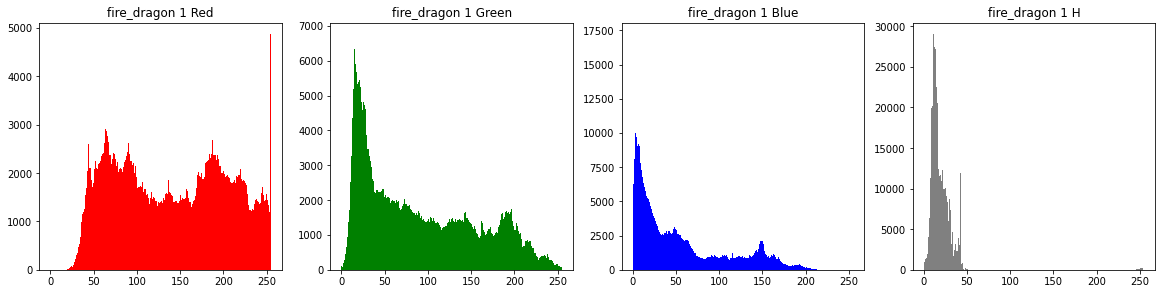

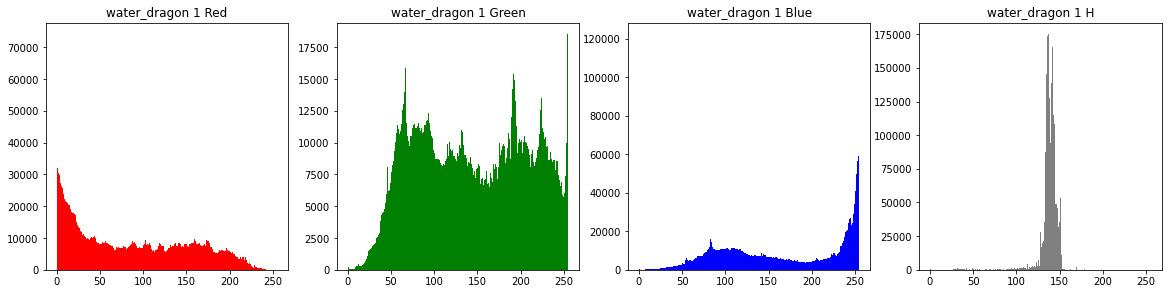

In [5]:
dragon_types = ['fire_dragon', 'water_dragon']
for i in dragon_types:
    buffer_img = io.imread(f'{path_dir}/{i}/3.jpg') 
    buffer_imgH= util.img_as_ubyte(color.rgb2hsv(buffer_img)[:,:,0])
    plt.figure(figsize=( 20 , 10 ))
    plt.subplot( 2 , 4 , 1 )
    plt.title( f'{i} {1} Red' )
    plt.hist(buffer_img[:,:,0].flatten(),256 , range=( 0 , 255 ),color ="red")

    plt.subplot( 2 , 4 , 2 )
    plt.title( f'{i} {1} Green' )
    plt.hist(buffer_img[:,:,1].flatten(),256 , range=( 0 , 255 ),color ="green")

    plt.subplot( 2 , 4 , 3 )
    plt.title( f'{i} {1} Blue' )
    plt.hist(buffer_img[:,:,2].flatten(),256 , range=( 0 , 255 ),color ="blue")
   
    plt.subplot( 2 , 4 , 4 )
    plt.title( f'{i} {1} H' )
    plt.hist(buffer_imgH.flatten(),256 , range=( 0 , 255 ),color ="gray")
   

Gambar diatas merupakan analisa kami terhadap kedua sample gambar(naga api dan naga air) terhadap domain warna yaitu RGB dan H sebagai sudut warna RGB.
Dari pengamatan kami kedua gambar tersebut memiliki dominan warna disatu sisi. Sebagai contoh naga api memiliki kecendrungan warna merah dan naga air warna biru. namun, setelah kami teliti lebih lanjut warna tersebut tidak mengidentifikasi kecendrungan dalam suatu nilai. 

sehingga kami mencoba model H pada HSV dan ternyata model tersebut dapat dikelompokan sebagai : 
1. Naga api memiliki kecendrungan nilai yang besar pada nilai 0-50
2. Naga Air memiliki kendrungan nilai besar pada nilai 100-150

Dari spekulasi diatas kami lakukan perhitungan frekuensi dari tiap tiap titik dan melakukan perhitungan kumulatif terhadap frekuensi tersebut. Dimana bilai nilai kumulati pada titik 50 lebih besar dari nilai titik 150 dikurangi nilai 50 mengindikasikan naga tersebut merupakan naga api dan sebaliknya.



# 2. Hough Transformation Diberikan dua buah kelas citra yaitu kelas tic tac toe dan juga sudoku yang terdiri dari masing-masing 5 citra untuk kedua kelas.

## a. Gunakan hasil hough transformation yang telah didapatkan sebagai fitur untuk mengklasifikasikan apakah citra tersebut merupakan tic tac toe atau sudoku


In [6]:
def predict_ht(img,games):
        original_image = np.copy(img)
        # convert image to gray
        gray = (color.rgb2gray(img) * 255 ).astype(np.uint8)
        # find all of the edges using canny
        edges = cv.Canny(gray, 50 , 150 , apertureSize= 3 )
        # find all of the lines using hough transformation
        lines = cv.HoughLines(edges, 1 , np.pi/ 180 , 200 )
        # plotting line
        for line in lines:
            for rho,theta in line:
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a*rho
                y0 = b*rho
                x1 = int(x0 + 1000 *(-b))
                y1 = int(y0 + 1000 *(a))
                x2 = int(x0 - 1000 *(-b))
                y2 = int(y0 - 1000 *(a))
                cv.line(img, (x1,y1), (x2,y2), ( 255 , 0 , 0 ), 3 )
        if len(lines) > 20:
          return games[1]
        else:
          return games[0]

In [7]:
# Nama folder 
games = ['tic_tac_toe', 'sudoku']
# Literasi sesuai nama folder
for game in games:
    for path_DT in os.listdir(f'{path_dir}/{game}'):
        img = io.imread(f'{path_dir}/{game}/{path_DT}')
        print(f'image {game} {path_DT} predicted as {predict_ht(img,games)}')


image tic_tac_toe 2.png predicted as tic_tac_toe
image tic_tac_toe 3.jpg predicted as tic_tac_toe
image tic_tac_toe 4.jpg predicted as tic_tac_toe
image tic_tac_toe 5.png predicted as tic_tac_toe
image tic_tac_toe 1.png predicted as tic_tac_toe
image sudoku 1.jpg predicted as sudoku
image sudoku 2.jpg predicted as sudoku
image sudoku 3.jpg predicted as sudoku
image sudoku 5.jpg predicted as sudoku
image sudoku 4.jpg predicted as sudoku


## b. Jelaskan fitur yang telah Anda buat pada bagian b dan alasan Anda memilih fitur tersebut
fitur yang digunakan adalah fitur global secara khusus Hough Transformation. Hough transformation mendeteksi bentuk-bentuk pada citra dalam garis lurus. pada soal 2.A masing-masing citra sudoku dan tic tac toe memiliki garis-garis horizontal dan vertikal. Dengan memperhatikan fitur garis-garis tersebut kita dapat memprediksi suatu citra termasuk sudoku atau tictactoe. misal pada citra tictactoe jumlah garisnya sebanyak 8 (kecuali gambar ke 5 yakni 18), sedangkan sudoku memiliki garis horizontal dan vertikal lebih banyak dari garis pada citra sudoku dengan memanfaatkan kondisi tersebut kita dapat memprediksi gambar yang diinput. pada citra ke-5 dalam folder tictactoe setiap petak pada citra terdeteksi sebagai garis (pada citra tictactoe lain tidak berlaku) sehingga hasil perhitung garis akan lebih besar daripada citra tictactoe lainnya.

# 3. Template Matching Diberikan citra ‘sayuran.jpg’ dan ‘kol.jpg’.
## a. Lakukan dan tampilkan hasil template matching dengan threshold 0.9, 0.7, dan 0.5! Anda bisa menggunakan library OpenCV/Skimage/lainnya.

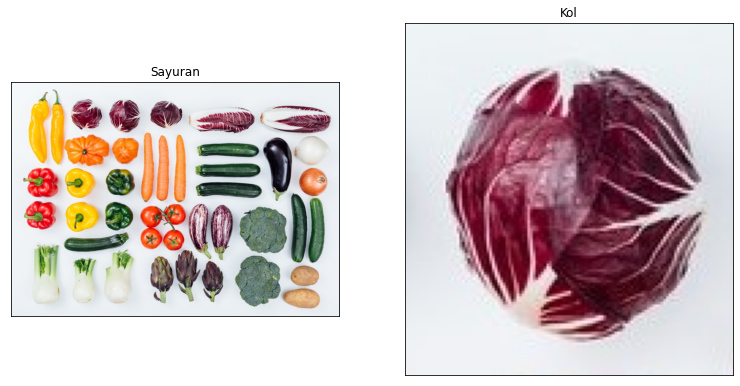

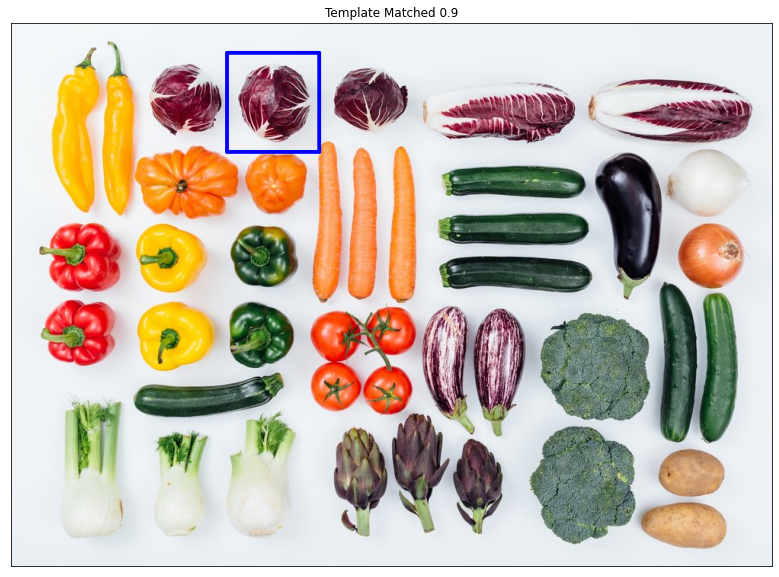

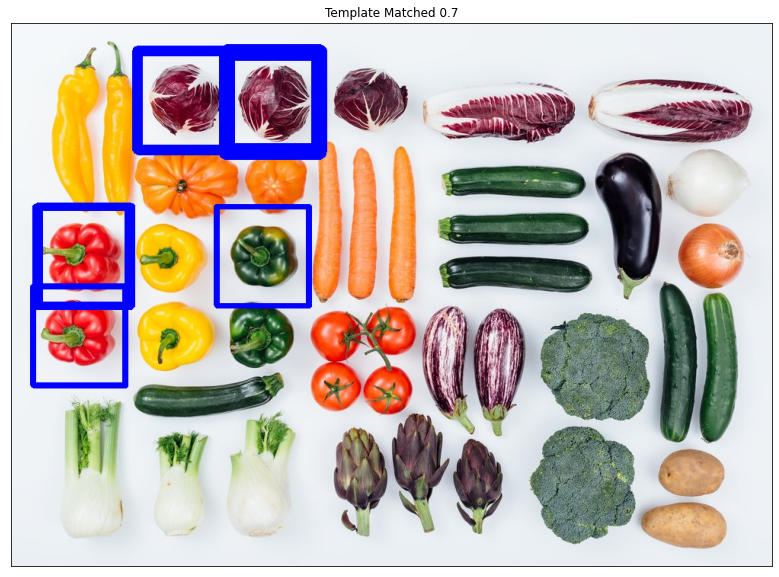

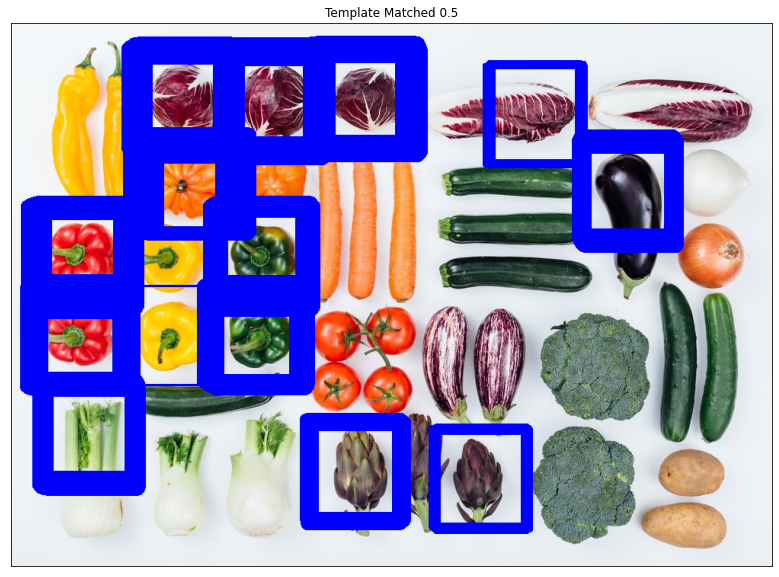

In [11]:
img_uses = ['sayuran.jpg','kol.jpg']
# Membaca gambar dan mengubahnya menjadi RGB
sayuran_img = cv.cvtColor(cv.imread( f'{path_dir}/{img_uses[0]}' ),cv.COLOR_BGR2RGB)
kol_img = cv.cvtColor(cv.imread( f'{path_dir}/{img_uses[1]}' ),cv.COLOR_BGR2RGB)
# Mengubah warna menjadi Abu-abu
sayuran_img_gray = cv.cvtColor(sayuran_img, cv.COLOR_RGB2GRAY)
kol_img_gray = cv.cvtColor(kol_img, cv.COLOR_RGB2GRAY)

# Menampilkan gambar sayuran dan kol
plt.figure(figsize=( 20 , 10 ))
plt.subplot( 131 ),plt.imshow(sayuran_img)
plt.title( 'Sayuran' ), plt.xticks([]), plt.yticks([])
plt.subplot( 132 ),plt.imshow(kol_img)
plt.title( 'Kol' ), plt.xticks([]), plt.yticks([])
plt.show()
# mengabil tinggi dan lebar gambar kol/template yang telah di balik urutanya
w, h = kol_img_gray.shape[:: -1 ]
# mengambil matrik match template dengan coeff normed
res = cv.matchTemplate(sayuran_img_gray, kol_img_gray, cv.TM_CCOEFF_NORMED)
# Mengkopi gambar sayuran
template_matched = sayuran_img.copy()
# list masukan threshold satuan
thresholds = [0.9, 0.7,0.5]
# list threshold
for threshold in thresholds:
  # melakukan perbandingan setiap isi list matriks dengan treshold
  loc = np.where( res >= threshold)
  # memplot gambar kotak dilam gambar yang telah dikopi sebelumnya
  for point in zip (*loc[:: -1 ]):
    cv.rectangle(template_matched, point, (point[ 0 ] + w, point[ 1 ] + h), ( 0 , 0 , 255 ), 2 )
  # Menampilkan gambar
  plt.figure(figsize=( 20 , 10 ))
  plt.imshow(template_matched,cmap='gray')
  plt.title( f'Template Matched {threshold}' ), plt.xticks([]),plt.yticks([])
  plt.show()

## b. Berdasarkan eksplorasi di poin a, perbedaan apa yang Anda temukan? Bagaimana perbedaan threshold mempengaruhi hasil?


Secara teory :
 Template matching berkerja dengan cara mengeserkan tamplate gambar di gambar asal(dalam hal ini gambar yang ingin dicari objeknya). Setiap lokasi template di gambar disimpan pada matrix R yang menampung lokasi (x,y). proses penggeseran tersebut terdapat persamaan yang digunakan dalam algoritma diatas menggunakan persamaan *TM_CCORR_NORMED* gambar dibawah merupakan matrix dari hasil sliding dimana titik putih paling terang menunjukan nilai yang paling tinggi.

 thershold sendiri digunakan untuk menbatasi nilai yang akan diperbolehkan untuk mendeteksi gambar tersebut. 
 [opencv](https://docs.opencv.org/3.4/de/da9/tutorial_template_matching.html)

 Dari ekperimen kami spekulasi yang kami dapati adalah pada hasil dari template matching memiliki beberapa titik nilai yang hampir sama dengan template gambar.
 Pengurangan nilai threshold menyebabkan objek pada gambar yang dideteksi oleh template matching tidak se-akurasi nilai yang terbesar.

 Sebagai gambaran :
 tentu Secara akal manusia terdapat kol 3 buah kol, saat menggunakan thershol 0.9 model ini hanya mendeteksi objek kol yang sama dengan model template kol dan tidak mendeteksi objek kol lainnya(/2 buah kol yang lain). Setelah menurunkan threshold menjadi 0.7 model ini tidak dapat mendeteksi 1 kol paling kiri melainkan hanya mendeteksi kol yang lain. Semakin menurunkan threshold ke-3 objek kol dapat dikenali namun kesalahan model semakin tinggi.




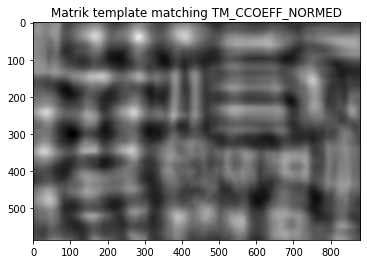

(array([400, 401, 402, ..., 557, 556, 557]), array([ 19,  19,  19, ..., 539, 540, 540]))


In [12]:
# Lampiran
plt.imshow(res,cmap="gray")
plt.title( 'Matrik template matching TM_CCOEFF_NORMED' )
plt.show()

print(loc[::-1])

## c. Menurut Anda, apakah kelebihan dan kekurangan metode fitur ekstraksi ini?

Dari penjelasan dan eksperimen yang kami dapati kami simpulkan.
- Methode ini memiliki keunggulan untuk mendapati objek yang sama dengan tamplate gambar tersebut.

Namun keunggulan tersebut menjadi kekurangan dari model fitur extraksi ini dimana:
untuk gambar dengan jenis yang sama (seperti kol) fitur ektraksi ini tidak dapat mendeteksinya karena metode ini berfokus mencari korelasi antara gambar utama dengan tampletnya. Sehingga untuk mendeteksi objek yang sama dengan model yang berbeda diperlukan template yang baik untuk mendeteksinya.
